## Simple Linear Regression

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,60,145
3,46,143
4,80,182


Text(0, 0.5, 'Height')

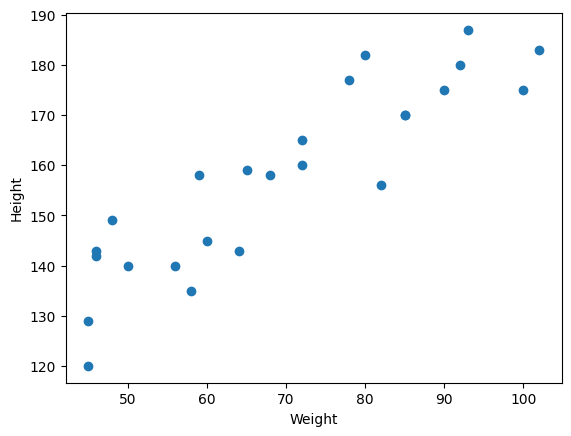

In [58]:
##Scatter Plot
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.894766
Height,0.894766,1.000000


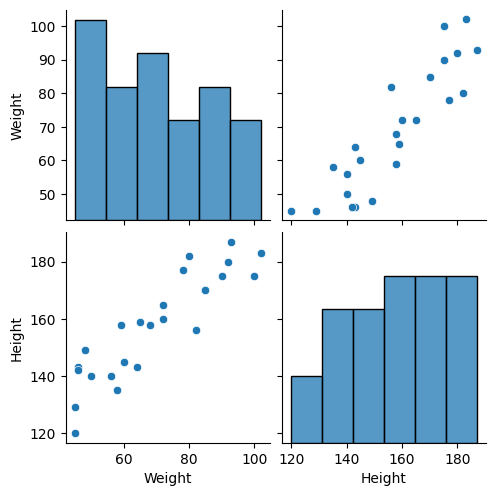

In [63]:
#3 Seaborn for visualization
sns.pairplot(df)

In [15]:
## Independent and dependent features
X=df[['Weight']] ## independent features should be data frame or 2D array
y=df['Height'] ## this can be of series or 1D array

In [28]:
X_series=df['Weight']
np.array(X).shape

(25, 1)

In [16]:
np.array(y).shape

(25,)

In [18]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.transform(X_test)

In [24]:
X_test

array([[ 2.15621899],
       [-1.5178891 ],
       [-1.5178891 ],
       [-0.58266159],
       [ 0.68657576],
       [ 2.28982293],
       [ 1.68860524]])

In [25]:
## Apply Simple linear Regression
from sklearn.linear_model import LinearRegression

In [32]:
regression=LinearRegression(n_jobs=-1)

In [33]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [34]:
regression

LinearRegression(n_jobs=-1)

In [37]:
print('Coefficient or slope:',regression.coef_)
print('Intercept:',regression.intercept_)

Coefficient or slope: [12.58144918]
Intercept: 156.22222222222223


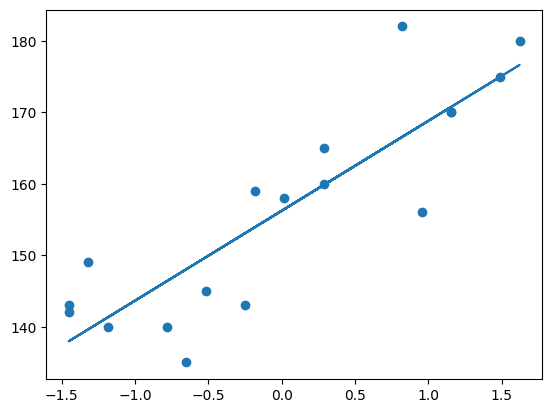

In [40]:
## Plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

#### Prediction of test data
1. Predicted height output = intercept_ + coef_(Weights)
2. y_pred_test = 156.222 + 12.581(X_test)

In [42]:
## Prediction for Test data
y_pred=regression.predict(X_test)
print(y_pred)

[183.35058192 137.12497762 137.12497762 148.89149508 164.8603402
 185.03151298 177.46732319]


In [43]:
## Performance Metrics
from  sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

107.76393033840964
9.487555953446734
10.380940725117817


### R square
Formula

**R^2 = 1 - SSR/SST**

R^2= coefficient of determination
SSR= sum of squares of residuals
SST= total sum of squares

In [45]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(y_test,y_pred)
print(score)

0.8256016716235527


### Adjusted R Square
Formula

**Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]**

R2= The R2 of the model
n=The number of observation
k=The number of predictor variables


In [48]:
## display adjusted R-squared
adjusted_r2=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adjusted_r2)

0.7907220059482633


## OLS Linear Regression

In [49]:
import statsmodels.api as sm

In [50]:
model=sm.OLS(y_train,X_train).fit()

In [52]:
prediction=model.predict(X_test)
print(prediction)

[ 27.12835969 -19.0972446  -19.0972446   -7.33072715   8.63811797
  28.80929076  21.24510096]


In [53]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.052
Method:                 Least Squares   F-statistic:                             0.1100
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                       0.744
Time:                        15:00:31   Log-Likelihood:                         -116.48
No. Observations:                  18   AIC:                                      235.0
Df Residuals:                      17   BIC:                                      235.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [55]:
## prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\enter\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([159.817547])